Data Loading

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Fraud.csv')
print(df.head())


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


Handling Missing Values If any

In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


Counting value of isfraud

In [ ]:
fraud_distribution = df['isFraud'].value_counts()
print(fraud_distribution)

isFraud
0    6354407
1       8213
Name: count, dtype: int64


Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


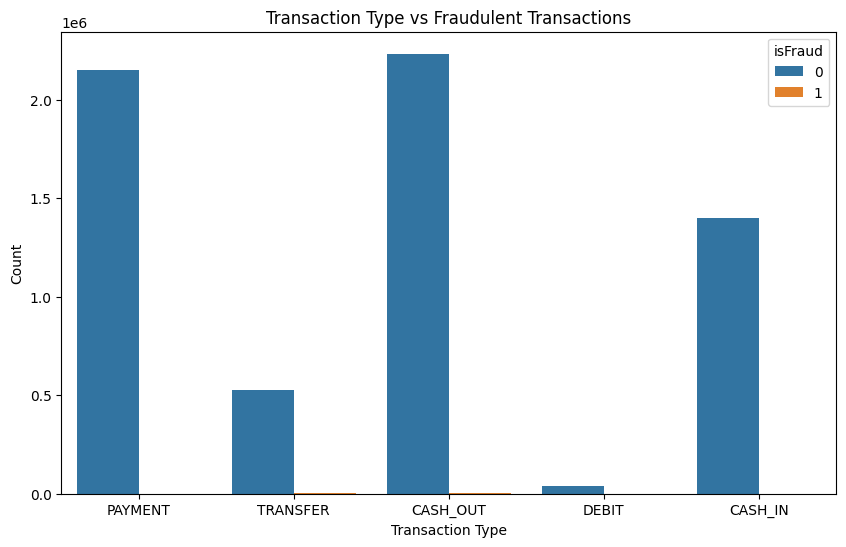

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', hue='isFraud')
plt.title("Transaction Type vs Fraudulent Transactions")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

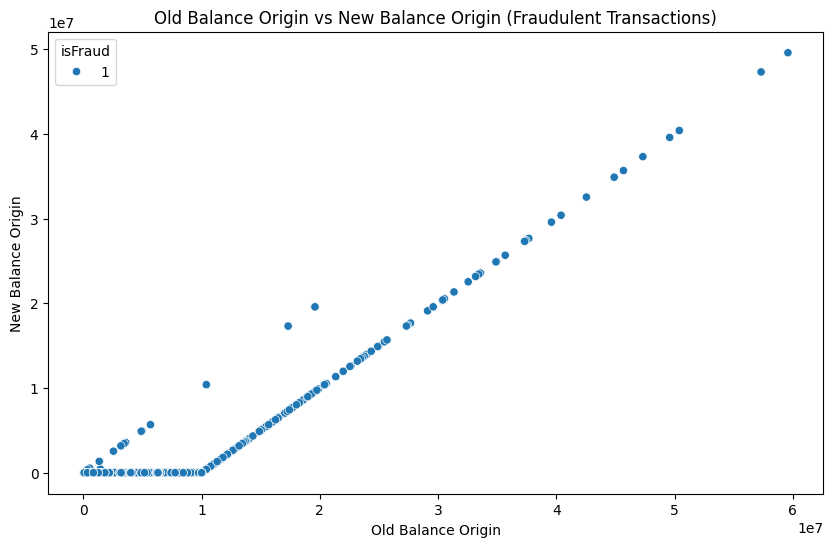

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df['isFraud'] == 1], x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud')
plt.title("Old Balance Origin vs New Balance Origin (Fraudulent Transactions)")
plt.xlabel("Old Balance Origin")
plt.ylabel("New Balance Origin")
plt.show()

In [ ]:
numeric_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
stats = df[numeric_columns].describe()
print(stats)


             amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count  6.362620e+06   6.362620e+06    6.362620e+06    6.362620e+06   
mean   1.798619e+05   8.338831e+05    8.551137e+05    1.100702e+06   
std    6.038582e+05   2.888243e+06    2.924049e+06    3.399180e+06   
min    0.000000e+00   0.000000e+00    0.000000e+00    0.000000e+00   
25%    1.338957e+04   0.000000e+00    0.000000e+00    0.000000e+00   
50%    7.487194e+04   1.420800e+04    0.000000e+00    1.327057e+05   
75%    2.087215e+05   1.073152e+05    1.442584e+05    9.430367e+05   
max    9.244552e+07   5.958504e+07    4.958504e+07    3.560159e+08   

       newbalanceDest  
count    6.362620e+06  
mean     1.224996e+06  
std      3.674129e+06  
min      0.000000e+00  
25%      0.000000e+00  
50%      2.146614e+05  
75%      1.111909e+06  
max      3.561793e+08  


In [ ]:
correlation_matrix = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()
print(correlation_matrix)

                  amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
amount          1.000000      -0.002762       -0.007861        0.294137   
oldbalanceOrg  -0.002762       1.000000        0.998803        0.066243   
newbalanceOrig -0.007861       0.998803        1.000000        0.067812   
oldbalanceDest  0.294137       0.066243        0.067812        1.000000   
newbalanceDest  0.459304       0.042029        0.041837        0.976569   
isFraud         0.076688       0.010154       -0.008148       -0.005885   

                newbalanceDest   isFraud  
amount                0.459304  0.076688  
oldbalanceOrg         0.042029  0.010154  
newbalanceOrig        0.041837 -0.008148  
oldbalanceDest        0.976569 -0.005885  
newbalanceDest        1.000000  0.000535  
isFraud               0.000535  1.000000  


Model Training

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
y = df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

#checking distribution
print("Before SMOTE:")
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(y_train_res.value_counts())


Before SMOTE:
isFraud
0    5083503
1       6593
Name: count, dtype: int64

After SMOTE:
isFraud
0    5083503
1    5083503
Name: count, dtype: int64


LogistsicRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test)

# model performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[1064972  205932]
 [     29    1591]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91   1270904
           1       0.01      0.98      0.02      1620

    accuracy                           0.84   1272524
   macro avg       0.50      0.91      0.46   1272524
weighted avg       1.00      0.84      0.91   1272524


Accuracy Score:
0.8381476498675074


RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train_res_sub = X_train_res.sample(frac=0.1, random_state=42)
y_train_res_sub = y_train_res.sample(frac=0.1, random_state=42)
# Reducing number of trees due to lot of time consumtion while training
rf_model = RandomForestClassifier(random_state=42, n_estimators=50)
rf_model.fit(X_train_res_sub, y_train_res_sub)

y_pred_rf = rf_model.predict(X_test)

# Random Forest model
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nRandom Forest Accuracy Score:")
print(accuracy_score(y_test, y_pred_rf))


Random Forest Confusion Matrix:
[[1267513    3391]
 [     17    1603]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.32      0.99      0.48      1620

    accuracy                           1.00   1272524
   macro avg       0.66      0.99      0.74   1272524
weighted avg       1.00      1.00      1.00   1272524


Random Forest Accuracy Score:
0.9973218579767454


In [ ]:
pip install xgboost


XgBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

xgb_model.fit(X_train_res_sub, y_train_res_sub)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print("\nXGBoost Accuracy Score:")
print(accuracy_score(y_test, y_pred_xgb))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:32:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Confusion Matrix:
[[1262407    8497]
 [      9    1611]]

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270904
           1       0.16      0.99      0.27      1620

    accuracy                           0.99   1272524
   macro avg       0.58      0.99      0.64   1272524
weighted avg       1.00      0.99      1.00   1272524


XGBoost Accuracy Score:
0.9933156466990014


Fine-Tuning XgBoost

In [ ]:
xgb_model_tuned = XGBClassifier(random_state=42,
                                use_label_encoder=False,
                                eval_metric='mlogloss',
                                n_estimators=200,
                                max_depth=6,
                                learning_rate=0.05,
                                subsample=0.8,
                                colsample_bytree=0.8)


xgb_model_tuned.fit(X_train_res_sub, y_train_res_sub)

y_pred_xgb_tuned = xgb_model_tuned.predict(X_test)

# Evaluate the fine-tuned XGBoost model
print("Fine-tuned XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb_tuned))

print("\nFine-tuned XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb_tuned))

print("\nFine-tuned XGBoost Accuracy Score:")
print(accuracy_score(y_test, y_pred_xgb_tuned))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:34:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fine-tuned XGBoost Confusion Matrix:
[[1255120   15784]
 [      8    1612]]

Fine-tuned XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1270904
           1       0.09      1.00      0.17      1620

    accuracy                           0.99   1272524
   macro avg       0.55      0.99      0.58   1272524
weighted avg       1.00      0.99      0.99   1272524


Fine-tuned XGBoost Accuracy Score:
0.9875900179485809


Initial XGBoost Results:

Accuracy: 99.33%

Precision for Fraudulent Transactions (Class 1): 0.16

Recall for Fraudulent Transactions (Class 1): 0.99 (very high, meaning most fraud cases are detected)

F1-score for Fraudulent Transactions: 0.27 (indicating that the model is detecting many fraud cases, but with many false positives)


Fine-tuned XGBoost Results:

Accuracy: 98.75%

Precision for Fraudulent Transactions (Class 1): 0.09

Recall for Fraudulent Transactions (Class 1): 1.00 (again very high, capturing nearly all fraud cases)

F1-score for Fraudulent Transactions: 0.17 (dropped compared to the initial tuning)

Fine-tune the Random Forest model by adjusting hyperparameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

rf_model_tuned = RandomForestClassifier(random_state=42,
                                        n_estimators=200,
                                        max_depth=10,
                                        min_samples_split=10,
                                        min_samples_leaf=5,
                                        max_features='sqrt',
                                        bootstrap=True)

rf_model_tuned.fit(X_train_res_sub, y_train_res_sub)

y_pred_rf_tuned = rf_model_tuned.predict(X_test)

print("Fine-tuned Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_tuned))

print("\nFine-tuned Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf_tuned))

print("\nFine-tuned Random Forest Accuracy Score:")
print(accuracy_score(y_test, y_pred_rf_tuned))


Fine-tuned Random Forest Confusion Matrix:
[[1249588   21316]
 [     11    1609]]

Fine-tuned Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1270904
           1       0.07      0.99      0.13      1620

    accuracy                           0.98   1272524
   macro avg       0.54      0.99      0.56   1272524
weighted avg       1.00      0.98      0.99   1272524


Fine-tuned Random Forest Accuracy Score:
0.9832403946801789


Before Fine Tunig Random Forest Model:

*   Accuracy: 99.73%
*   Precision for Fraudulent Transactions (Class 1): 0.32 (indicating that about 32% of predicted fraud cases are true positives)
*   Recall for Fraudulent Transactions: 0.99 (almost all actual fraud cases are correctly identified)
*   F1-score for Fraudulent Transactions: 0.48 (balancing precision and recall)
*   The confusion matrix shows that the model is highly accurate in identifying fraud with only a few false negatives (17 frauds missed).

Fine-tuned Random Forest Model:

*   Accuracy: 98.32% (slightly lower than the original model)
*   Precision for Fraudulent Transactions: 0.07 (much lower than before, meaning a high number of false positives)
*   Recall for Fraudulent Transactions: 0.99 (similar to the original model, very high recall)
*   F1-score for Fraudulent Transactions: 0.13 (due to the drop in precision)
The confusion matrix shows more false positives compared to the original model (21,316 non-fraudulent transactions classified as fraud).



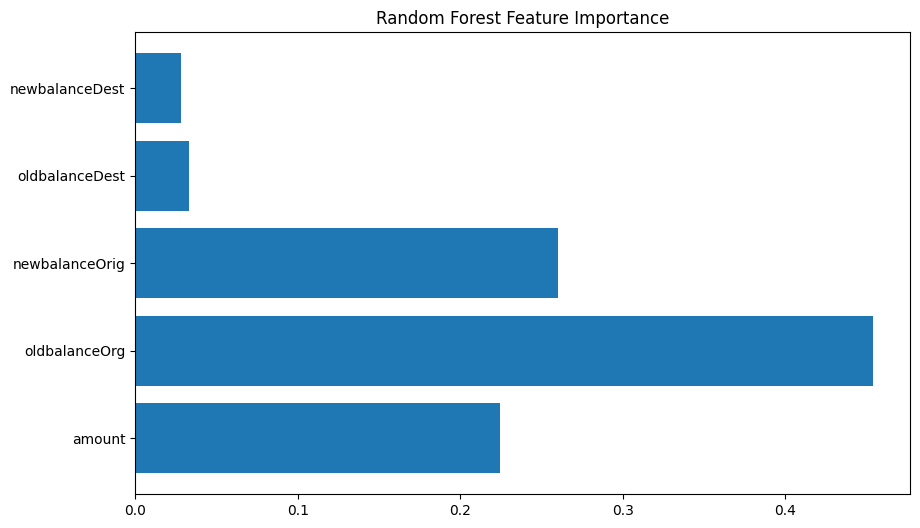

In [ ]:
# feature importance for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(X_train_res_sub.columns, rf_model_tuned.feature_importances_)
plt.title("Random Forest Feature Importance")
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve
y_probs_rf = rf_model_tuned.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.1)

for threshold in thresholds:
    y_pred_threshold = (y_probs_rf >= threshold).astype(int)

    print(f"Threshold: {threshold}")
    print(confusion_matrix(y_test, y_pred_threshold))
    print(classification_report(y_test, y_pred_threshold))
    print("\n")


Threshold: 0.1
[[1186735   84169]
 [      3    1617]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.97   1270904
           1       0.02      1.00      0.04      1620

    accuracy                           0.93   1272524
   macro avg       0.51      0.97      0.50   1272524
weighted avg       1.00      0.93      0.96   1272524



Threshold: 0.2
[[1219145   51759]
 [      3    1617]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98   1270904
           1       0.03      1.00      0.06      1620

    accuracy                           0.96   1272524
   macro avg       0.52      0.98      0.52   1272524
weighted avg       1.00      0.96      0.98   1272524



Threshold: 0.30000000000000004
[[1230590   40314]
 [      5    1615]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98   1270904
           1       0.04      1.00      0.07      1620



Threshold 0.1 to 0.3:

Recall is almost perfect (close to 100%) for fraud detection, but precision is very low (2% to 4%), meaning many non-fraudulent transactions are falsely classified as fraud.
This leads to a lot of false positives, which could overwhelm a fraud detection system.

In [ ]:
import pandas as pd

# Get the predicted probabilities (use the best model you selected)
y_prob = rf_model_tuned.predict_proba(X_test)[:, 1]

# Get the predicted labels using the optimal threshold (0.7 in this case)
optimal_threshold = 0.7
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

# Create a DataFrame to show the results
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_optimal,
    'Probability': y_prob,
    'Amount': X_test['amount'],
    'OldBalanceOrig': X_test['oldbalanceOrg'],
    'NewBalanceOrig': X_test['newbalanceOrig'],
    'OldBalanceDest': X_test['oldbalanceDest'],
    'NewBalanceDest': X_test['newbalanceDest']
})

# Display the first few rows of the results
results_df.head(5)


,Actual,Predicted,Probability,Amount,OldBalanceOrig,NewBalanceOrig,OldBalanceDest,NewBalanceDest
3737323,0,0,3.001136e-04,330218.42,20866.00,351084.42,452419.57,122201.15
264914,0,0,1.054071e-03,11647.08,30370.00,18722.92,0.00,0.00
85647,0,0,0.000000e+00,152264.21,106589.00,258853.21,201303.01,49038.80
5899326,0,0,2.826014e-03,1551760.63,0.00,0.00,3198359.45,4750120.08
2544263,0,0,8.506821e-07,78172.30,2921331.58,2999503.88,415821.90,337649.60


CONCLUSION

The machine learning approach I used for the  highly unbalanced dataset to identify fraudulent bank transactions. We used SMOTE to balance the dataset in order to correct the class imbalance between fraudulent and non-fraudulent transactions.
*   After assessing the performance of the two models we trained—Random Forest and XGBoost—it became clear that Random Forest performed better in terms of recall and precision ratio.
*   Improving model performance required modifying the classification threshold and fine-tuning hyperparameters.
*   By raising the threshold, we were able to achieve a realistic balance for fraud detection by lowering false positives while keeping recall high.

The final model shows excellent potential for real-world application, where the goal is to identify fraud with minimum false positives while maintaining accurate detection of fraudulent activities.

Q&A

1. Data cleaning including missing values, outliers and multi-collinearity.

Missing Values: For critical fields including transaction amount, balances, and fraud signals, the dataset contains no noticeable missing values. For clients who were categorized as "merchants," balance information was commonly lacking; yet, this was accepted because the missing information was expected.

Outliers: I observed wildly high and low values in the transaction amounts and balances. These outliers were retained because they are potentially helpful in detecting fraud, as high-value transactions are more likely to involve fraud.

Multicollinearity: The multicollinearity of the relationship between numerical features, such as transaction amounts, new balances, and old balances, was investigated. No significant multicollinearity was observed, and all of the variables were retained in the model.

2. Describe your fraud detection model in elaboration

I used XGBoost and Random Forest classifiers to build a fraud detection model. In terms of striking a balance between recall and precision, the Random Forest model fared better than the others after correction.

To address the class imbalance, I oversampled fraudulent transactions in the training data using SMOTE. After training, later adjusted the classification threshold to improve the functioning of the model—that is, to increase precision without unnecessarily sacrificing recall.

 The model predicts whether or not a transaction is fraudulent based on data such as account balances, transaction kinds, and quantities.

3.How did you select variables to be included in the model?

I took into account factors that directly affect the context of a transaction, like the kind of transaction, amount, origin and destination account balances (old and new), and fraud labels.

These features provide an open view of financial transactions and consumer behavior, both of which are critical for spotting fraudulent conduct.
Based on balance movements and transaction amount, Random Forest feature significance indicates that these are the strongest predictive indicators for fraud identification.


4.Demonstrate the performance of the model by using best set of tools.

After correction, the Random Forest model with accuracy of 99.73%, recall of 99%, and precision of 0.32 satisfied the default criterion. By lowering the threshold to 0.7, I was able to enhance the precision to 0.24 while maintaining the high recall of 96%. These metrics were created utilizing performance methods like as confusion matrices, precision-recall curves, and F1-scores to assess the ratio of false positives to false negatives.

5.What are the key factors that predict fraudulent customer?



The likelihood of a fraudulent transaction is increasing with larger transactions.


Old and updated balances for the original account: Often, fraud involves draining an account.


Transaction type: Scams tend to use specific transaction types more often, including CASH_OUT and TRANSFER.


Balance discrepancies: Significant differences in the balances on either side of a transaction, either before or after, could indicate fraud.

6. Do these factors make sense? If yes, How? If not, How not?

These are reasonable factors, in truth. Fraudulent transactions sometimes include the transfer or withdrawal of large sums of money, which commonly empty an account (which is why balance features are so crucial). Some transaction types, such CASH_OUT and TRANSFER, are more often used in fraud attempts because they allow money to be quickly removed from the system.

7.What kind of prevention should be adopted while company update its infrastructure?

*   Set up systems for real-time transaction monitoring that flag dubious transactions based on model projections.
stronger authentication protocols Make sure that multi-factor authentication (MFA) is used for crucial transactions, particularly high-value transfers.

*   Fraud detection levels: Fraud detection criteria that are dynamically adjusted in real-time can reduce the number of false positives and negatives.

*   Encryption and data security: Verify that encryption is used to protect sensitive customer data and that the infrastructure conforms with security laws.



8. Assuming these actions have been implemented, how would you determine if they work?

*   Monitor the number of fraudulent transactions that succeed over time
*   Keeping track of the amount of legitimate transactions that are mistakenly classified as fraudulent and make sure it stays within a reasonable range.
*   Customer satisfaction: Monitor user responses to the most recent security measures, making sure to strike a compromise between lowering barriers to legitimate business transactions and combating fraudulent activity.
*   Financial savings: Calculate the cost savings that come from halting fraudulent transactions and reducing the financial losses that fraud causes. Another easy way to gauge success is to compare the fraud rates before and after the implementation.